<a href="https://colab.research.google.com/github/sfujita0601/Lab_assistance/blob/main/jitter_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
import seaborn as sns
from google.colab import files
uploaded = files.upload()


   TCho[mg/dl] label
1       76.800    CN
2       56.743    CN
3       97.978    CN
4       82.039    CN
5       80.070    CN
['TCho[mg/dl]', 'label']
[0 1 2 3 4 5 6 7]
[78.726, 82.1778, 68.7414, 88.884, 74.85059999999999, 71.4772, 53.794200000000004, 64.2188]
[14.751131939617377, 3.815575932935947, 3.682842353400429, 14.424575730329122, 4.370215418031472, 6.716251834170605, 8.853598093430715, 5.135813732993051]
      variable   value
0  TCho[mg/dl]    76.8
1  TCho[mg/dl]  56.743
2  TCho[mg/dl]  97.978
3  TCho[mg/dl]  82.039
4  TCho[mg/dl]   80.07
   TCho[mg/dl] label
1       76.800    CN
2       56.743    CN
3       97.978    CN
4       82.039    CN
5       80.070    CN


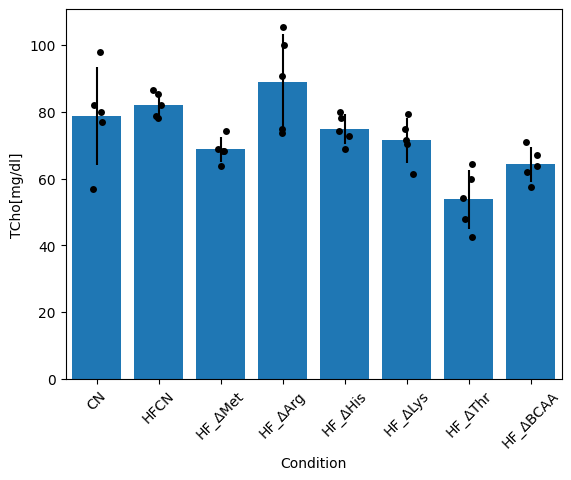

In [27]:
# アップロードしたエクセルファイルを読み込む
#df = pd.read_excel('/content/240906 GTT.xlsx', sheet_name='Sheet2', header=0)
# csvはこちら
df = pd.read_excel('/content/testdata.csv',  header=0, index_col=0)

# 最初の5行を表示
print(df.head())

# 列名を取得する
Col_name = list(df.columns)
print(Col_name)

# label列だけ抜き出す。もしlabel列を用意してなければエラー表示
if 'label' in Col_name:
  Col_name.remove('label')
else:
  print('label列がありません。')

# labelの数だけ棒グラフを描画する
Label = sorted(set(df['label']), key=list(df['label']).index)
for j in range(len(Col_name)):
  Mean_list = []
  Std_list = []

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)

  # bar chart & error bar
  x_position = np.arange(len(Label))
  for i in range(len(Label)):
    Mean_list.append(df[df['label'] == Label[i]][Col_name].mean().values[0])
    Std_list.append(df[df['label'] == Label[i]][Col_name].std().values[0])

  print(x_position)
  print(Mean_list)
  print(Std_list)
  error_bar_set = dict(lw = 1, capthick = 1, capsize = 20)
  #ax.bar(x_position, Mean_list, yerr=Std_list, tick_label=Col_name, error_kw=error_bar_set)
  ax.bar(x_position, Mean_list, yerr=Std_list, tick_label=Col_name)

  # jitter plot
  df_melt = pd.melt(df)
  print(df_melt.head())
  print(df.head())

  sns.stripplot(x='label', y=Col_name[j], data=df, jitter=True, color='black', ax = ax)

  ax.set_xticklabels(Label,rotation=45)
  ax.set_xlabel('Condition')
  ax.set_ylabel(Col_name[j])
  plt.show()

